In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -u "/content/drive/My Drive/SHREYA_CAPSTONE/dataset.zip" -d "/content/data"

Archive:  /content/drive/My Drive/SHREYA_CAPSTONE/dataset.zip


In [ ]:
d1 = '/content/data/dataset/fold1/D1.wav'

In [ ]:
s1 = '/content/data/dataset/fold2/S1.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display


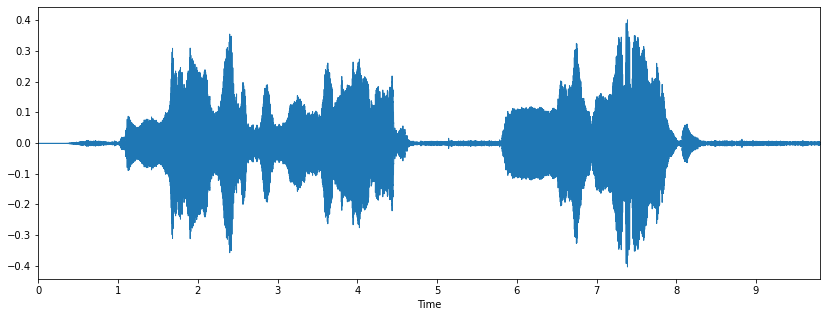

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(d1)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(d1)

In [ ]:
sample_rate

22050

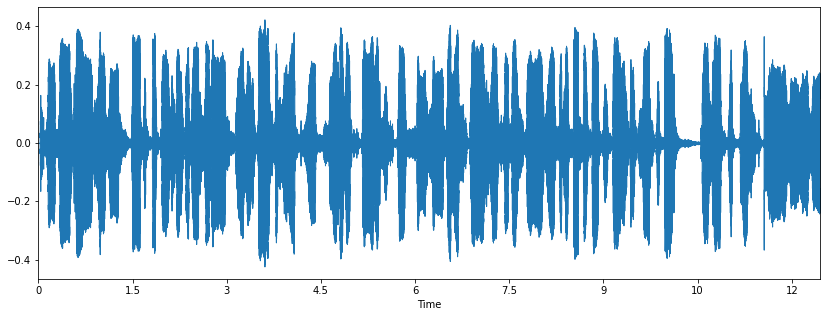

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(s1)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(s1)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(d1)

In [ ]:
wave_sample_rate

44100

In [ ]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-102,  -48],
       [ -95,  -24],
       [ -74,    4]], dtype=int16)

In [ ]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.20327611,
       -0.17812286,  0.        ], dtype=float32)

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/data/dataset/metadata.csv')
metadata.head(700)

filename  class  fold
0      D1.wav  drunk     1
1      D2.wav  drunk     1
2      D3.wav  drunk     1
3      D4.wav  drunk     1
4      D5.wav  drunk     1
..        ...    ...   ...
695   S96.wav  sober     2
696   S97.wav  sober     2
697   S98.wav  sober     2
698   S99.wav  sober     2
699  S100.wav  sober     2

[700 rows x 3 columns]

In [ ]:
metadata['class'].value_counts()

drunk    600
sober    600
Name: class, dtype: int64

In [ ]:
import librosa
audio_file_path='/content/data/dataset/fold1/D1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00132082 -0.00230074
 -0.00184188]


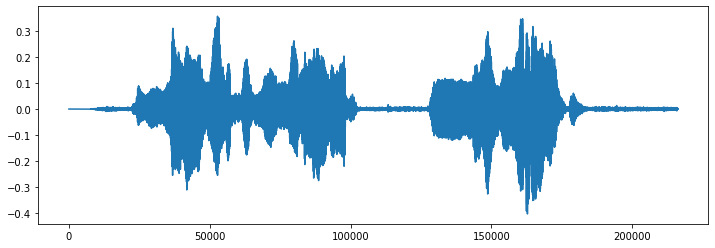

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-102,  -48],
       [ -95,  -24],
       [ -74,    4]], dtype=int16)

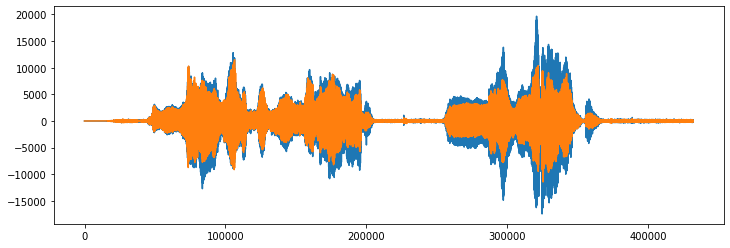

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

40 features over 423 frames

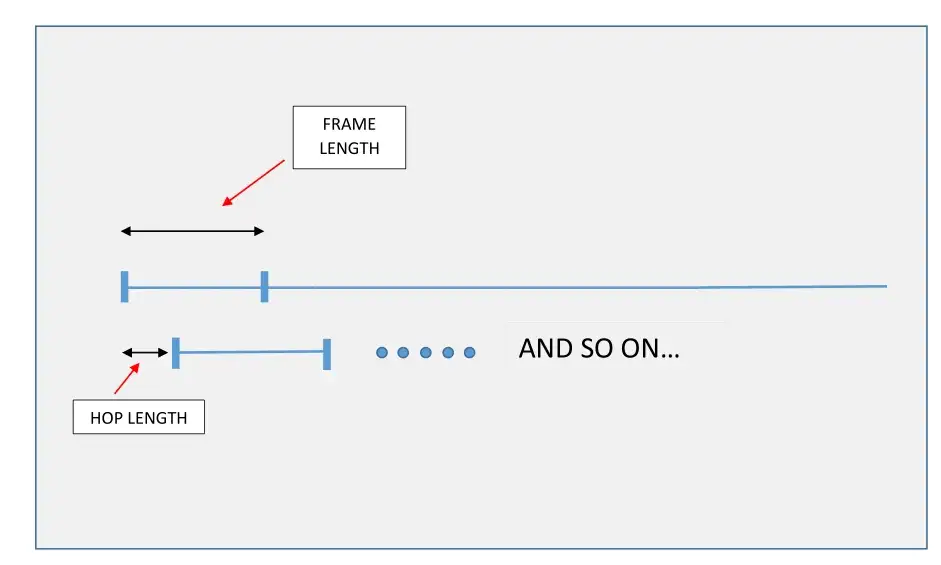

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 423)


mfccs

In [ ]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/data/dataset/'
metadata=pd.read_csv('/content/data/dataset/metadata.csv')
metadata.head(700)

filename  class  fold
0      D1.wav  drunk     1
1      D2.wav  drunk     1
2      D3.wav  drunk     1
3      D4.wav  drunk     1
4      D5.wav  drunk     1
..        ...    ...   ...
695   S96.wav  sober     2
696   S97.wav  sober     2
697   S98.wav  sober     2
698   S99.wav  sober     2
699  S100.wav  sober     2

[700 rows x 3 columns]

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') #Part of Librosa to reduce load time
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm

In [ ]:

### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row['fold'])+'/',str(row["filename"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1200it [03:14,  6.17it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(700)

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [ ]:
X.shape

(1200, 40)

In [ ]:
y=np.array(pd.get_dummies(y))

In [ ]:
y.shape

(1200, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [ ]:
X_train

array([[-151.03284   ,  102.715004  ,  -42.600636  , ...,   -0.8791891 ,
           0.6423699 ,    3.2135344 ],
       [-265.3002    ,   78.45539   ,  -31.999306  , ...,    5.7960567 ,
          12.132745  ,   12.164958  ],
       [-266.08072   ,   88.04268   ,  -28.099186  , ...,   -1.0301768 ,
          -1.8860204 ,   -6.419098  ],
       ...,
       [ -94.681946  ,  141.73048   ,  -50.107147  , ...,   -0.6417764 ,
           1.7095648 ,    0.32022324],
       [-154.99686   ,   55.281055  ,  -45.811897  , ...,   -1.0335273 ,
           0.9693218 ,   -0.7126327 ],
       [-182.52719   ,   75.608826  ,  -45.31575   , ...,   -0.5023563 ,
          -1.3176991 ,   -3.170594  ]], dtype=float32)

In [ ]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [ ]:
X_train.shape

(960, 40)

In [ ]:
X_test.shape

(240, 40)

In [ ]:
y_train.shape

(960, 2)

In [ ]:
y_test.shape

(240, 2)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from keras.layers import Dense, Flatten, MaxPooling2D
from keras.utils import np_utils

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               4100      
                                                                 
 activation_32 (Activation)  (None, 100)               0         
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 200)               20200     
                                                                 
 activation_33 (Activation)  (None, 200)               0         
                                                                 
 dropout_25 (Dropout)        (None, 200)               0         
                                                                 
 dense_34 (Dense)            (None, 100)              

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
29/30 [============================>.] - ETA: 0s - loss: 11.7048 - accuracy: 0.6810
Epoch 1: val_loss improved from inf to 1.65964, saving model to saved_models/audio_classification.hdf5
30/30 [==============================] - 2s 12ms/step - loss: 11.6984 - accuracy: 0.6833 - val_loss: 1.6596 - val_accuracy: 0.9375
Epoch 2/100
29/30 [============================>.] - ETA: 0s - loss: 5.0252 - accuracy: 0.8351
Epoch 2: val_loss improved from 1.65964 to 1.18382, saving model to saved_models/audio_classification.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 4.8786 - accuracy: 0.8385 - val_loss: 1.1838 - val_accuracy: 0.9250
Epoch 3/100
17/30 [================>.............] - ETA: 0s - loss: 3.1683 - accuracy: 0.8603
Epoch 3: val_loss improved from 1.18382 to 0.95983, saving model to saved_models/audio_classification.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 3.3099 - accuracy: 0.8625 - val_loss: 0.9598 - val_accuracy: 0.9375
Epoch 4/

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]*100)

96.24999761581421


In [ ]:
filename="/content/data/dataset/fold1/D1.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

print(classes_x)

#Print a space
print()

classes_y=np.argmax(y_test,axis=1)
#Print the actual values
print(classes_y)

8/8 [==============================] - 0s 2ms/step
[1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0
 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1
 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1]

[1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0
 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 0

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(classes_x,classes_y))

0.9625


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(classes_x,classes_y))

0.984


In [ ]:
from sklearn.metrics import recall_score, f1_score
print(recall_score(classes_x,classes_y))

print(f1_score(classes_x,classes_y))

0.9461538461538461
0.9647058823529412


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score


print("accuracy score :",accuracy_score(classes_x,classes_y))

print("precision score :", precision_score(classes_x,classes_y))

print("recall score :", recall_score(classes_x,classes_y))

print("f1 score :",f1_score(classes_x,classes_y))

cm1 = confusion_matrix(classes_x,classes_y)
total1=sum(sum(cm1))

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

print("confusion matrix = ",confusion_matrix(classes_x,classes_y))

accuracy score : 0.9625
precision score : 0.984
recall score : 0.9461538461538461
f1 score : 0.9647058823529412
Sensitivity :  0.9818181818181818
Specificity :  0.9461538461538461
confusion matrix =  [[108   2]
 [  7 123]]
